In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA

In [2]:
data=pd.read_csv("exchange_rates.csv")
data.head(5)

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021


In [5]:
data=data.drop(["Unnamed: 0"],axis=1)

In [12]:
data["date"]=pd.to_datetime(data["date"])
data.set_index("date",inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167235 entries, 2021-12-17 to 2025-01-07
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country/Currency  167235 non-null  object 
 1   currency          167235 non-null  object 
 2   value             167235 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.1+ MB


# Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Country/Currency"]=le.fit_transform(data["Country/Currency"])
data["currency"]=le.fit_transform(data["currency"])

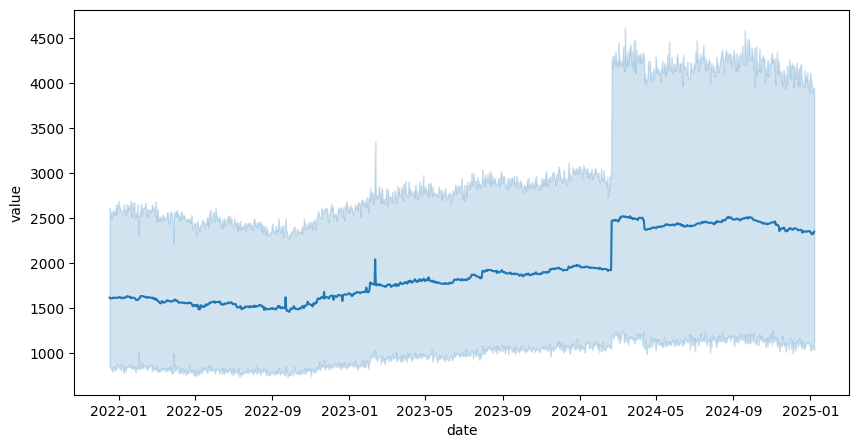

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date",y="value",data=data)
plt.show()

In [20]:
df=data[["value"]].values

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [32]:
def create_sequence (df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)
        

In [33]:
sequence_length=12

In [34]:
X,y=create_sequence(scaler_data,sequence_length)

In [35]:
X=X.reshape(X.shape[0],X.shape[1],1)
print(X.shape,y.shape)

(167223, 12, 1) (167223,)


# LSTM Model

In [36]:
model=Sequential()

In [37]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X,y,verbose=1,epochs=100,batch_size=32)

Epoch 1/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0045
Epoch 2/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0038
Epoch 3/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0031
Epoch 4/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0031
Epoch 5/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0032
Epoch 6/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0022
Epoch 7/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0021
Epoch 8/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0019
Epoch 9/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0018
Epoch 10/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0017
Epoch 11/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0017
Epoch 12/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0017
Epoch 13/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0015
Epoch 14/100
5226/5226 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0034
E

# Model Evaluation

In [42]:
loss=model.evaluate(X,y)
print("Model Loss:",loss)

5226/5226 ━━━━━━━━━━━━━━━━━━━━ 4s 780us/step - loss: 0.0024
Model Loss: 0.002617729129269719


# Predictions

In [43]:
predictions=model.predict(X)
predictions=scaler.fit_transform(predictions)
print(predictions)

5226/5226 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step
[[0.08066991]
 [0.07984333]
 [0.07881753]
 ...
 [0.24087529]
 [0.08276525]
 [0.07701755]]


In [44]:
actual_values=scaler.fit_transform(y.reshape(-1,1))